In [1]:
!pip install qiskit qiskit[visualization]
!pip install qiskit-aer
!pip install qiskit-ibm-runtime
!pip install pylatexenc
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.7 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=121a364fd0a282f0b0bdb94f88610c5a9fef0b3e921642597403ea8b7a82234e
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Bit-flip Error Detection:
No error results: {'00': 1000}


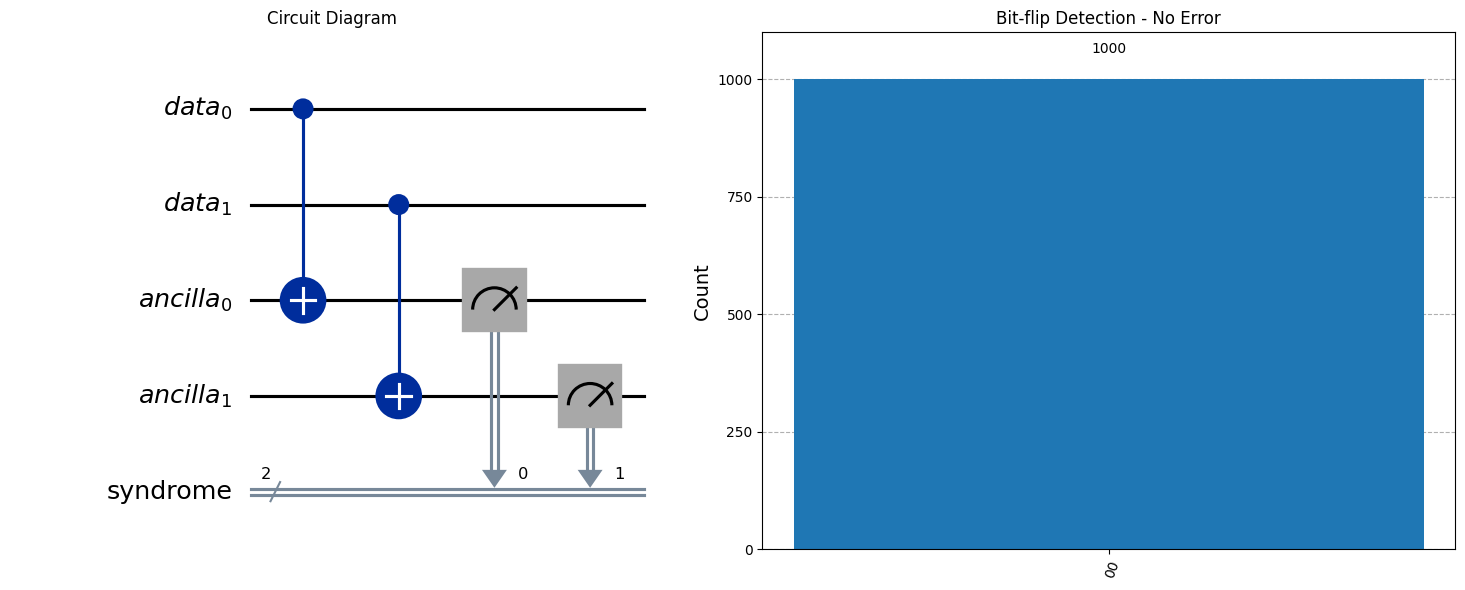

Bit-flip error on qubits: {'01': 1000}


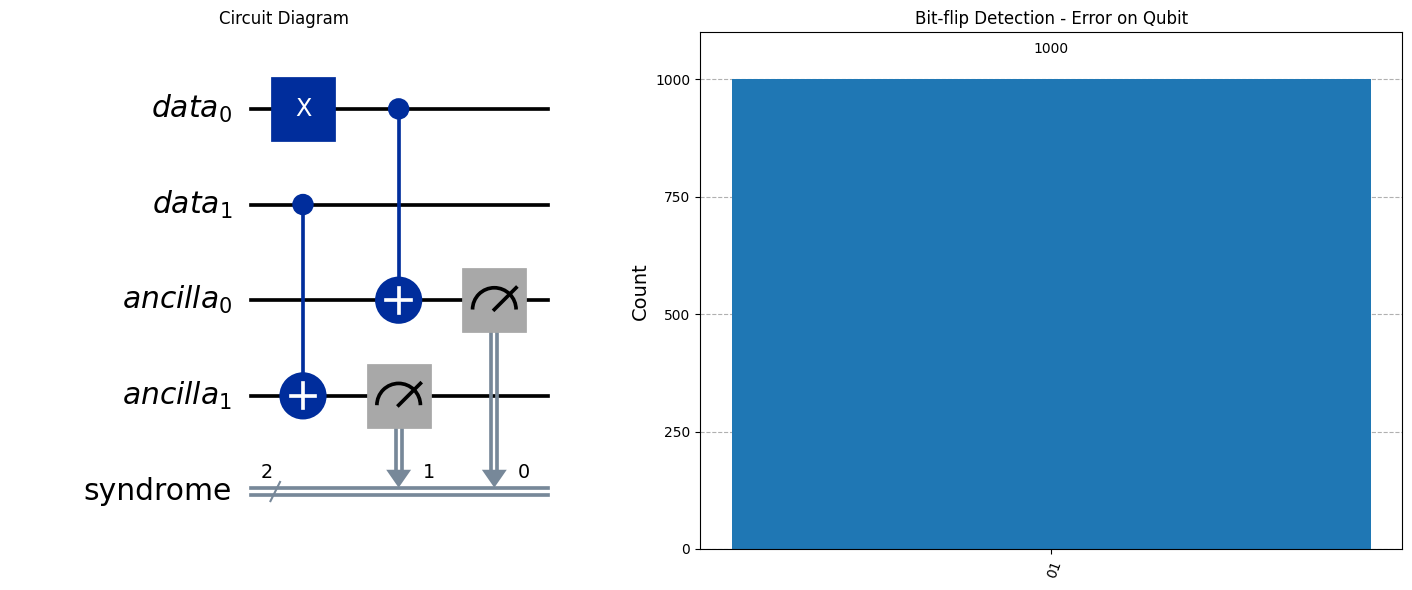


Phase-flip Error Detection:
No error results: {'00': 484, '11': 516}


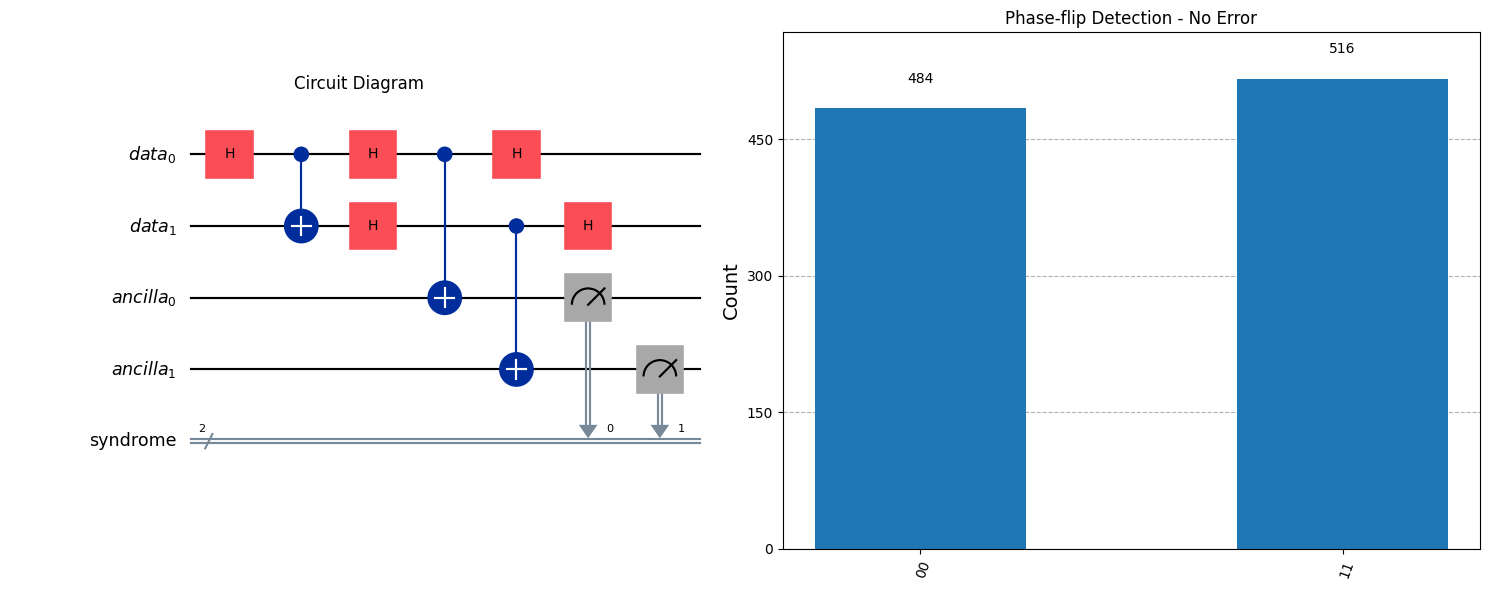

Phase-flip error on qubit: {'10': 507, '01': 493}


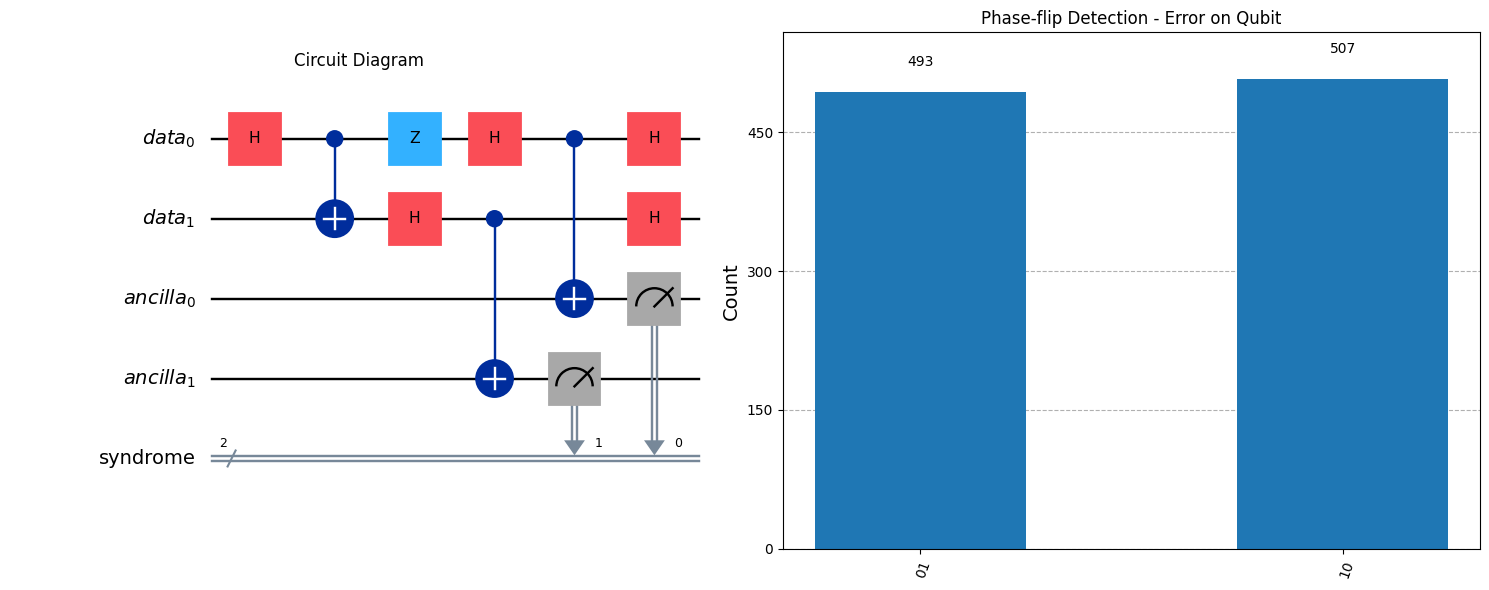


Analyzing Bit-flip Detection Circuit:

Circuit Analysis:
Number of qubits: 4
Number of classical bits: 2
Circuit depth: 2
Number of operations: 4

Operation breakdown:
- cx: 2
- measure: 2

Analyzing Phase-flip Detection Circuit:

Circuit Analysis:
Number of qubits: 4
Number of classical bits: 2
Circuit depth: 5
Number of operations: 10

Operation breakdown:
- h: 5
- cx: 3
- measure: 2


<ipython-input-4-7d6526d382ff>:198: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  for instruction, qargs, cargs in circuit.data:


In [4]:
###### ERROR DETECTION CODE #######

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, plot_circuit_layout
from qiskit_aer import Aer
import numpy as np
import matplotlib.pyplot as plt


def flip_detection(qc):
  # Error detection circuit
    qc.cx(QuantumRegister(2, 'data')[0], QuantumRegister(2, 'ancilla')[0])
    qc.cx(QuantumRegister(2, 'data')[1],QuantumRegister(2, 'ancilla')[1])

    # Measure syndrome
    qc.measure(QuantumRegister(2, 'ancilla'), ClassicalRegister(2, 'syndrome'))
    return qc


def phase_detection(qc):

   # Convert to X-basis for phase-flip detection
    qc.h(QuantumRegister(2, 'data')[0])
    qc.h(QuantumRegister(2, 'data')[1])
  # Error detection circuit (same as bit-flip but in X-basis)
    qc.cx(QuantumRegister(2, 'data')[0], QuantumRegister(2, 'ancilla')[0])
    qc.cx(QuantumRegister(2, 'data')[1], QuantumRegister(2, 'ancilla')[1])

    # Convert back to Z-basis
    qc.h(QuantumRegister(2, 'data')[0])
    qc.h(QuantumRegister(2, 'data')[1])

    # Measure syndrome
    qc.measure(QuantumRegister(2, 'ancilla'), ClassicalRegister(2, 'syndrome'))

    return qc

def create_bit_flip_detection_circuit():
    """
    Creates a quantum circuit that can detect bit-flip errors on two qubits
    using a third ancilla qubit as a syndrome qubit.
    """
    # Create quantum registers
    data = QuantumRegister(2, 'data')    # 2 data qubits
    ancilla = QuantumRegister(2, 'ancilla')  # 1 syndrome qubit
    syndrome = ClassicalRegister(2, 'syndrome')  # Classical bit for measurement

    # Create quantum circuit
    qc = QuantumCircuit(data, ancilla, syndrome)

    # Prepare initial 2 qubit state (can be modified)
    # qc.z(data[0])
    # qc.x(data[0])
    # qc.h(data[0])

    return qc

def create_phase_flip_detection_circuit():
    """
    Creates a quantum circuit that can detect phase-flip errors on two qubits
    using a third ancilla qubit as a syndrome qubit.
    """
    # Create quantum registers
    data = QuantumRegister(2, 'data')
    ancilla = QuantumRegister(2, 'ancilla')
    syndrome = ClassicalRegister(2, 'syndrome')

    # Create quantum circuit
    qc = QuantumCircuit(data, ancilla, syndrome)

    # Prepare initial state
    # Uncomment any of below examples to test

    qc.h(data[0])           #1
    qc.cx(data[0], data[1])

    # qc.h(data[0])     #2
    # qc.h(data[1])

    return qc

def simulate_error_detection(circuit, error_type='bit_flip'):
    """
    Simulates the error detection circuit with optional induced errors.

    Args:
        circuit (QuantumCircuit): The quantum circuit to simulate
        error_type (str): Type of error to induce ('bit_flip' or 'phase_flip')
        error_location (int): Index of qubit to apply error to (None for no error)
    """
    modified_circuit = circuit.copy()

    if error_type == 'bit_flip':
      modified_circuit = flip_detection(modified_circuit)
    elif error_type == 'phase_flip':
      modified_circuit= phase_detection(modified_circuit)

    # Execute the circuit
    backend = Aer.get_backend('qasm_simulator')
    job = backend.run(modified_circuit, shots=1000)
    result = job.result()
    return result.get_counts(), modified_circuit

def visualize_circuit_and_results(circuit, counts, title):
    """
    Creates visualization of the circuit and its measurement results.

    Args:
        circuit (QuantumCircuit): The quantum circuit to visualize
        counts (dict): The measurement results
        title (str): Title for the results histogram
    """
    # Create a figure with two subplots
    fig = plt.figure(figsize=(15, 6))

    # Plot circuit diagram
    ax1 = plt.subplot(1, 2, 1)
    circuit.draw(output='mpl', ax=ax1)
    ax1.set_title('Circuit Diagram')

    # Plot measurement results
    ax2 = plt.subplot(1, 2, 2)
    plot_histogram(counts, ax=ax2, title=title)

    plt.tight_layout()
    return fig

def demonstrate_error_detection():
    """
    Demonstrates both bit-flip and phase-flip error detection circuits
    with and without induced errors, including visualizations.
    """
    # Bit-flip error detection demonstration
    print("Bit-flip Error Detection:")
    bit_flip_circuit = create_bit_flip_detection_circuit()

    # No error
    counts, circuit = simulate_error_detection(bit_flip_circuit,'bit_flip')
    print("No error results:", counts)
    fig1 = visualize_circuit_and_results(circuit, counts, "Bit-flip Detection - No Error")
    plt.show()

    ######### ADD  BIT-FLIP ERRORS HERE #########

    bit_flip_circuit.x(0)
    # bit_flip_circuit.x(1)

    ########

    counts, circui = simulate_error_detection(bit_flip_circuit, 'bit_flip')
    print("Bit-flip error on qubits:", counts)
    fig2 = visualize_circuit_and_results(circui, counts, "Bit-flip Detection - Error on Qubit")
    plt.show()

    # Phase-flip error detection demonstration
    print("\nPhase-flip Error Detection:")
    phase_flip_circuit = create_phase_flip_detection_circuit()

    # No error
    counts, circuit1 = simulate_error_detection(phase_flip_circuit, 'phase_flip')
    print("No error results:", counts)
    fig3 = visualize_circuit_and_results(circuit1, counts, "Phase-flip Detection - No Error")
    plt.show()

    ########## ADD  PHASE-FLIP ERRORS HERE #########

    phase_flip_circuit.z(0)
    # phase_flip_circuit.z(1)

    #######

    counts, circuit2 = simulate_error_detection(phase_flip_circuit, 'phase_flip')
    print("Phase-flip error on qubit:", counts)
    fig4 = visualize_circuit_and_results(circuit2, counts, "Phase-flip Detection - Error on Qubit")
    plt.show()

    print("\nAnalyzing Bit-flip Detection Circuit:")
    analyze_circuit_details(circuit)

    print("\nAnalyzing Phase-flip Detection Circuit:")
    analyze_circuit_details(circuit1)


def analyze_circuit_details(circuit):
    """
    Prints detailed analysis of the quantum circuit.

    Args:
        circuit (QuantumCircuit): The quantum circuit to analyze
    """
    print("\nCircuit Analysis:")
    print(f"Number of qubits: {circuit.num_qubits}")
    print(f"Number of classical bits: {circuit.num_clbits}")
    print(f"Circuit depth: {circuit.depth()}")
    print(f"Number of operations: {len(circuit.data)}")
    print("\nOperation breakdown:")
    op_counts = {}
    for instruction, qargs, cargs in circuit.data:
        op_name = instruction.name
        op_counts[op_name] = op_counts.get(op_name, 0) + 1
    for op, count in op_counts.items():
        print(f"- {op}: {count}")

if __name__ == "__main__":
    # Demonstrate circuits with visualization
    demonstrate_error_detection()